# - 8px - Grayscale -

In [2]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

## Radial Clusters

In [4]:
driver = Img_Driver()

X = driver.pixels_rgb(8, rgb=True, divider=255)
Y = driver.define_y_linear("modern", 8, rgb=True)

X_test = driver.pixels_rgb(8, rgb=True, divider=255, test=True)
Y_test = driver.define_y_linear("modern", 8, rgb=True, test=True)

# X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
# Y_test = [1.0 if x < 80 else 0.0 for x in range(240)]

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:1])
print()
# print(f"X_test : {len(X_test)} {len(X_test[0])}")
# print(X_test[0:1])
# print()
# print(f"Y_test : {len(Y_test)}")
# print(Y_test)
# print()

X : 4528 192
[[0.9019607843137255, 0.9333333333333333, 0.996078431372549, 0.9294117647058824, 0.9568627450980393, 1.0, 0.9647058823529412, 0.9803921568627451, 1.0, 0.9803921568627451, 0.996078431372549, 1.0, 0.9803921568627451, 0.996078431372549, 1.0, 0.9607843137254902, 0.9803921568627451, 1.0, 0.9411764705882353, 0.9647058823529412, 1.0, 0.9176470588235294, 0.9490196078431372, 1.0, 0.9137254901960784, 0.9450980392156862, 1.0, 0.9529411764705882, 0.9764705882352941, 1.0, 0.9333333333333333, 0.9450980392156862, 0.9647058823529412, 0.7372549019607844, 0.7607843137254902, 0.788235294117647, 0.7254901960784313, 0.7450980392156863, 0.7725490196078432, 0.9137254901960784, 0.9294117647058824, 0.9490196078431372, 0.9529411764705882, 0.9764705882352941, 1.0, 0.9215686274509803, 0.9529411764705882, 1.0, 0.803921568627451, 0.8274509803921568, 0.8588235294117647, 0.9215686274509803, 0.9372549019607843, 0.9490196078431372, 0.788235294117647, 0.803921568627451, 0.8156862745098039, 0.6, 0.6274509803

Accuracy : 3034 / 4528
67.0%

Test accuracy : 160 / 240
66.7%



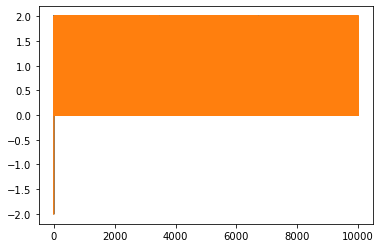

364.81294107437134


In [8]:
from ruster_rbf import Ruster_RBF
r = Ruster_RBF(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
XF_test = [item for sublist in X_test for item in sublist]
Y

gamma = 0.1
ndim = 192
nb_clusters = 50
model_size = len(X)
model = r.create_linear_model(model_size-1)

native_clusters = r.init_clusters(XF, nb_clusters, ndim)
r.k_means(XF, native_clusters, nb_clusters, ndim)
clusters = r.npify(native_clusters, nb_clusters*ndim)

r.destroy(native_clusters, nb_clusters*ndim)

# model_np = r.npify(model, model_size)
# print(model_np)
# print()

losses = []
test_losses = []

for i in range(10000):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_rbf_naive(model, clusters, X[rand_idx], ndim, gamma, True)
    predict_test = r.predict_rbf_naive(model, clusters, X_test[rand_idx_test], ndim, gamma, True)
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_rbf(model, clusters, Y, ndim, 50, 0.003, gamma)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]} out: {(Y[rand_idx] - predict)}")
#     print()

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_rbf_naive(model, clusters, X[i], ndim, gamma, True)
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_rbf_naive(model, clusters, X_test[i], ndim, gamma, True)
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size, 13281101)

r.destroy(model, model_size)

Accuracy : 3034 / 4528
67.0%

Test accuracy : 160 / 240
66.7%



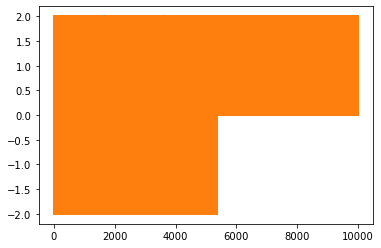

927.3522188663483


In [9]:
from ruster_rbf import Ruster_RBF
r = Ruster_RBF(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
XF_test = [item for sublist in X_test for item in sublist]
Y

gamma = 3
ndim = 192
nb_clusters = 100
model_size = len(X)
model = r.create_linear_model(model_size-1)

native_clusters = r.init_clusters(XF, nb_clusters, ndim)
r.k_means(XF, native_clusters, nb_clusters, ndim)
clusters = r.npify(native_clusters, nb_clusters*ndim)

r.destroy(native_clusters, nb_clusters*ndim)

# model_np = r.npify(model, model_size)
# print(model_np)
# print()

losses = []
test_losses = []

for i in range(10000):
    rand_idx = random.randint(0, len(X)-1)
    rand_idx_test = random.randint(0, len(X_test)-1)
    predict = r.predict_rbf_naive(model, clusters, X[rand_idx], ndim, gamma, True)
    predict_test = r.predict_rbf_naive(model, clusters, X_test[rand_idx_test], ndim, gamma, True)
    
    losses.append(Y[rand_idx] - predict)
    test_losses.append(Y_test[rand_idx_test] - predict_test)
    
    r.train_rosenblatt_rbf(model, clusters, Y, ndim, 50, 0.003, gamma)
    
#     t2 = time.time()
#     print(t2 - t1)
#     print(f"Pred : {predict} Y : {Y[rand_idx]}")
#     print(f"Test : {predict_test} Y_test : {Y_test[rand_idx_test]} out: {(Y[rand_idx] - predict)}")
#     print()

accurates = 0
accurates_test = 0
for i in range(len(X)):
    predict = r.predict_rbf_naive(model, clusters, X[i], ndim, gamma, True)
    if Y[i] - predict == 0:
        accurates += 1
        
for i in range(len(X_test)):
    predict_test = r.predict_rbf_naive(model, clusters, X_test[i], ndim, gamma, True)
    if Y_test[i] - predict_test == 0:
        accurates_test += 1
        
print(f"Accuracy : {accurates} / {len(Y)}")
print(f"{round(accurates/len(Y)*100, 1)}%")
print() 
print(f"Test accuracy : {accurates_test} / {len(Y_test)}")
print(f"{round(accurates_test/len(Y_test)*100, 1)}%")
print()

plt.plot(losses)
plt.plot(test_losses)
plt.show()

t2 = time.time()
print(t2 - t1)

r.store_model(model, model_size, 13281201)

r.destroy(model, model_size)